# Задача классификации

## 0.1.Импорт библиотек

In [3]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визу

## 0.2. Описание задачи

Имея информацию с опрошенных пациентов (без серьезных медицинских исследований), нужно спрогнозировать риск сердечно-сосудистых заболеваний

## 1. Загрузка&Просмотр данных

In [4]:
data_raw = pd.read_csv('dataset.csv')

Количество объектов:

In [5]:
data_raw.shape[0]

81884

Количество признаков:

In [6]:
data_raw.shape[1]

22

Сам датасет:

In [7]:
data_raw

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81879,1.0,0.0,0.0,0.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,0.0,4.0,0.0,1.0,10.0,4.0,4.0
81880,0.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,10.0,10.0,0.0,1.0,8.0,3.0,2.0
81881,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,4.0,0.0,1.0,9.0,6.0,4.0
81882,0.0,1.0,1.0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,2.0,2.0,0.0,1.0,10.0,5.0,2.0


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81884 entries, 0 to 81883
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  81884 non-null  float64
 1   HighBP                81884 non-null  float64
 2   HighChol              81884 non-null  float64
 3   CholCheck             81883 non-null  float64
 4   BMI                   81883 non-null  float64
 5   Smoker                81883 non-null  float64
 6   Stroke                81883 non-null  float64
 7   Diabetes              81883 non-null  float64
 8   PhysActivity          81883 non-null  float64
 9   Fruits                81883 non-null  float64
 10  Veggies               81883 non-null  float64
 11  HvyAlcoholConsump     81883 non-null  float64
 12  AnyHealthcare         81883 non-null  float64
 13  NoDocbcCost           81883 non-null  float64
 14  GenHlth               81883 non-null  float64
 15  MentHlth           

| Название столбца (признака) | Описание | Значения |
|------------------------|---------|---------|
| **HeartDiseaseorAttack**  | Ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ) | `0` - нет, `1` - есть |
| **HighBP**               | Высокое кровяное давление | `0` - нет, `1` - есть |
| **HighChol**             | Повышенный уровень холестерина | `0` - нет, `1` - есть |
| **CholCheck**            | Проверка уровня холестерина за последние 5 лет | `0` - нет, `1` - была |
| **BMI**                  | Индекс массы тела | `Положительное число` |
| **Smoker**               | Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь? | `0` - нет, `1` - да |
| **Stroke**               | Инсульт | `0` - нет, `1` - был |
| **Diabetes**             | Диабет | `0` - нет диабета, `1` - преддиабет, `2` - диабет |
| **PhysActivity**         | Физическая активность за последние 30 дней, не включая работу | `0` - нет, `1` - была |
| **Fruits**               | Употребление фруктов 1 и более раз за день | `0` - нет, `1` - да |
| **Veggies**              | Употребление овощей 1 и более раз за день | `0` - нет, `1` - да |
| **HvyAlcoholConsump**    | Сильно пьющие (взрослые мужчины, выпивающие более 14 напитков в неделю, и взрослые женщины, выпивающие более 7 напитков в неделю) | `0` - нет, `1` - да |
| **AnyHealthcare**        | Наличие любого вида медицинского обслуживания, включая медицинскую страховку и т.д. | `0` - нет, `1` - да |
| **NoDocbcCost**          | Было ли за последние 12 месяцев время, когда вам нужно было обратиться к врачу, но вы не могли этого сделать из-за дороговизны? | `0` - нет, `1` - да |
| **GenHlth**              | Здоровье пациента, по его мнению | `1` - отличное, `2` - очень хорошее, `3` - хорошее, `4` - удовлетворительное, `5` - плохое |
| **MentHlth**             | Сколько дней в течение последних 30 дней ваше психическое здоровье было плохим? | От `0` до `30` дней |
| **PhysHlth**             | Сколько дней в течение последних 30 дней ваше физическое здоровье было плохим? | От `0` до `30` дней |
| **DiffWalk**             | Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице? | `0` - нет, `1` - да |
| **Sex**                  | Пол | `0` - женский, `1` - мужской |
| **Age**                  | Возраст | `1` - от 18 до 24, `2` - от 25 до 29, `3` - от 30 до 34, `4` - от 35 до 39, `5` - от 40 до 44, `6` - от 45 до 49, `7` - от 50 до 54, `8` - от 55 до 59, `9` - от 60 до 64, `10` - от 65 до 69, `11` - от 70 до 74, `12` - от 75 до 79, `13` - от 80 и старше |
| **Education**            | Образование | `1` - никогда не посещал школу или только детский сад, `2` - 1-8 классы (начальная школа), `3` - 9-11 классы (старшая школа), `4` - 12 класс или GED (выпускник старшей школы), `5` - Колледж от 1 года до 3 лет (некоторые колледжи или техническая школа), `6` - Колледж 4 года или бол|
| **Income** | Доходы | `1` - менее 10 000 долларов США, `2` - менее 15 000 долларов США (от 10 000 до менее 15 000 долларов США), `3` - менее 20 000 долларов США (от 15 000 до менее 20 000 долларов США), `4` - менее 25 000 долларов США (от 20 000 до менее 25 000 долларов США), `5` - менее 35 000 долларов США (от 25 000 до менее 35 000 долларов США), `6` - менее 50 000 долларов США (от 35 000 до менее 50 000 долларов США), `7` -  менее 75 000 долларов США (от 50 000 до менее 75 000 долларов США), `8` - 75 000 долларов или больше |

Типы признаков:
+ Качественные (категориальные, факторные):
    + Неупорядоченные (номинальные)
    + Упорядоченные (порядковые)
+ Количественные (числовые):
    + Непрерывные
    + Дискретные

Признаки `BMI`, `PhysHlth`, `MentHelt` - количественные, остальные - категориальныекретные

> Категориальный признак (или номинальный признак) представляет собой качественную переменную, которая принимает значения из ограниченного и четко определенного набора категорий или меток. Эти категории не имеют внутреннего порядка или числового значения, их можно только сравнивать на равенство или неравенство

> Количественный признак (или числовой признак) представляет собой признак, который имеет числовое значение и может быть измерен или количественно оценен. Эти признаки предоставляют количественные данные и обычно обладают числовым значением, которое можно использовать для проведения математических операций, таких как сложение, вычитание, умножение и деление

Заменим тип столбцов на `category` для категориальных признаков

In [9]:
data_raw['HeartDiseaseorAttack'] = data_raw['HeartDiseaseorAttack'].astype('category')
data_raw['HighBP'] = data_raw['HighBP'].astype('category')
data_raw['HighChol'] = data_raw['HighChol'].astype('category')
data_raw['CholCheck'] = data_raw['CholCheck'].astype('category')
data_raw['Smoker'] = data_raw['Smoker'].astype('category')
data_raw['Stroke'] = data_raw['Stroke'].astype('category')
data_raw['Diabetes'] = data_raw['Diabetes'].astype('category')
data_raw['PhysActivity'] = data_raw['PhysActivity'].astype('category')
data_raw['Fruits'] = data_raw['Fruits'].astype('category')
data_raw['Veggies'] = data_raw['Veggies'].astype('category')
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')
data_raw['AnyHealthcare'] = data_raw['AnyHealthcare'].astype('category')
data_raw['NoDocbcCost'] = data_raw['NoDocbcCost'].astype('category')
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')
data_raw['GenHlth'] = data_raw['GenHlth'].astype('category')
data_raw['DiffWalk'] = data_raw['DiffWalk'].astype('category')
data_raw['Sex'] = data_raw['Sex'].astype('category')
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['Education'] = data_raw['Education'].astype('category')
data_raw['Income'] = data_raw['Income'].astype('category')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81884 entries, 0 to 81883
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   HeartDiseaseorAttack  81884 non-null  category
 1   HighBP                81884 non-null  category
 2   HighChol              81884 non-null  category
 3   CholCheck             81883 non-null  category
 4   BMI                   81883 non-null  float64 
 5   Smoker                81883 non-null  category
 6   Stroke                81883 non-null  category
 7   Diabetes              81883 non-null  category
 8   PhysActivity          81883 non-null  category
 9   Fruits                81883 non-null  category
 10  Veggies               81883 non-null  category
 11  HvyAlcoholConsump     81883 non-null  category
 12  AnyHealthcare         81883 non-null  category
 13  NoDocbcCost           81883 non-null  category
 14  GenHlth               81883 non-null  category
 15  Me

Информация о числовых признаках:

In [10]:
data_raw.describe()

,BMI,MentHlth,PhysHlth
count,81883.000000,81883.000000,81883.000000
mean,28.436818,3.132262,4.214013
std,7.381395,7.303895,8.670467
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


Информация о категориальных признаках:

In [11]:
data_raw.describe(include=['category'])

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,81884.0,81884.0,81884.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0,81883.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,74342.0,46764.0,46784.0,78833.0,45798.0,78519.0,68992.0,62698.0,51943.0,66699.0,77227.0,77697.0,74976.0,28546.0,68283.0,45612.0,10636.0,35891.0,30087.0


## 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать

### Диаграммы рассеивания для количественных признаков

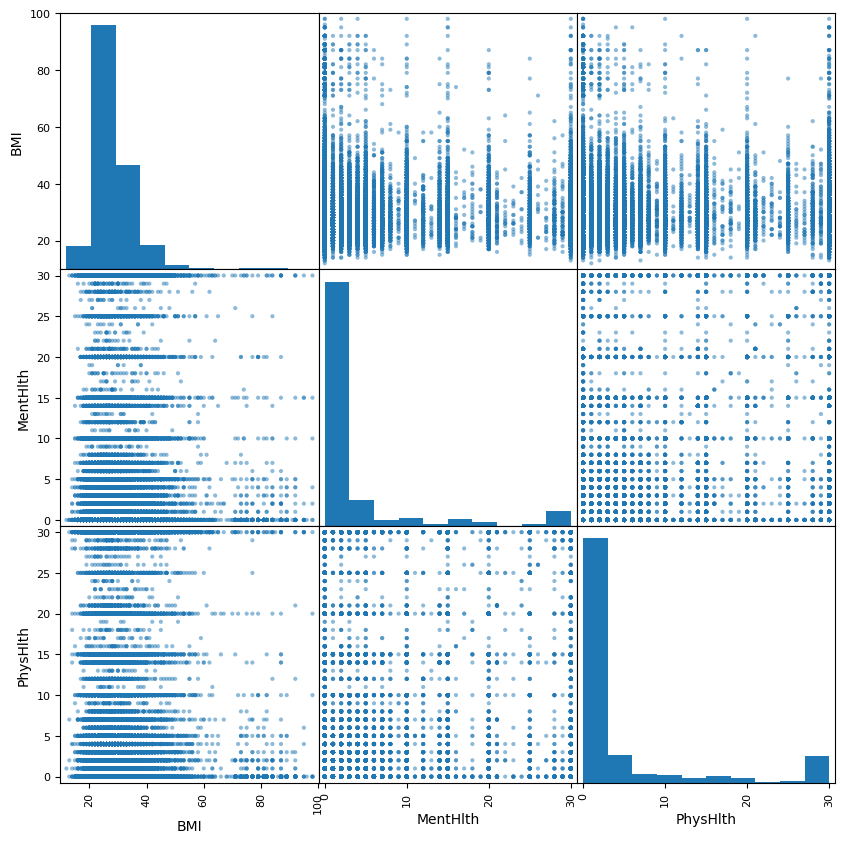

In [12]:
pd.plotting.scatter_matrix(data_raw, figsize=(10, 10))
pass

### Борьба с выбросами

#### Проверка для BMI

In [13]:
data_raw['BMI'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.00
0.010    18.00
0.050    20.00
0.100    22.00
0.500    27.00
0.900    36.00
0.950    40.00
0.990    53.00
0.995    74.59
Name: BMI, dtype: float64

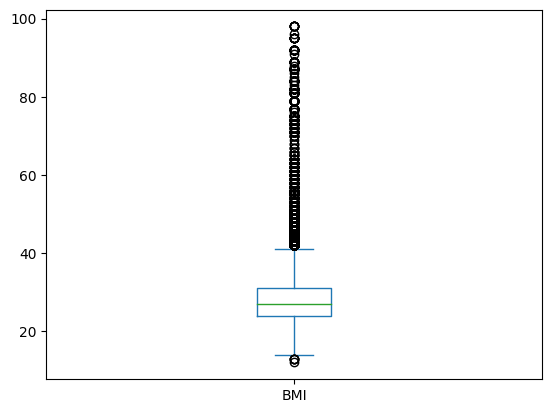

In [14]:
data_raw['BMI'].plot(kind='box')
pass

Отсюда видно, что **99%** всех значений признака `BMI` находятся в диапозоне от `17` до `55`, это значения квантилей **0.005** и **0.995** соответственно

#### Проверка для MentHlth

In [15]:
data_raw['MentHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    10.0
0.950    25.0
0.990    30.0
0.995    30.0
Name: MentHlth, dtype: float64

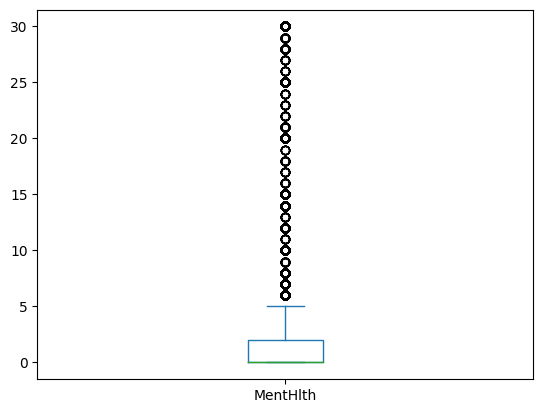

In [16]:
data_raw['MentHlth'].plot(kind='box')
pass

Отсюда видно, что **100%** всех значений признака `MentHlth` находятся в диапозоне от `0` до `30`, это значения квантилей **0.005** и **0.995** соответственно. То есть выбросов нет

#### Проверка для PhysHlth

In [17]:
data_raw['PhysHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    20.0
0.950    30.0
0.990    30.0
0.995    30.0
Name: PhysHlth, dtype: float64

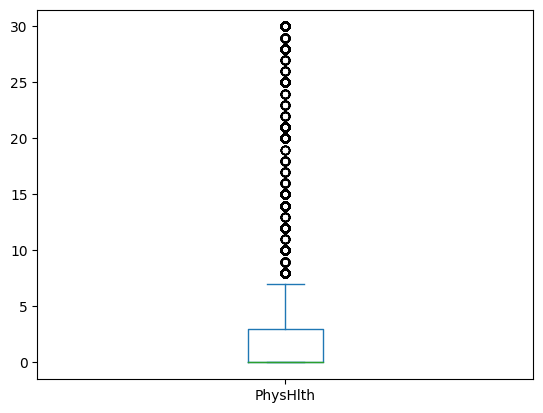

In [18]:
data_raw['PhysHlth'].plot(kind='box')
pass

Отсюда видно, что **100%** всех значений признака `PhysHlth` находятся в диапозоне от `0` до `30`, это значения квантилей **0.005** и **0.995** соответственно. То есть выбросов нет

#### Очистка от выбросов для BMI

Удалим все строки таблицы, которые содержат значения `BMI`, выходящие за пределы квантилей **0.005** и **0.995**

In [19]:
rows_to_drop = data_raw[
    (data_raw['BMI'] < data_raw['BMI'].quantile(0.005)) | (data_raw['BMI'] > data_raw['BMI'].quantile(0.995))
].index
rows_to_drop
data = data_raw.drop(rows_to_drop)
data.shape

(81273, 22)

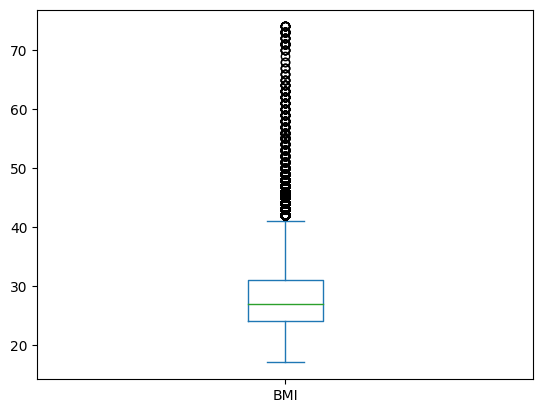

In [20]:
data['BMI'].plot(kind='box')
pass

Посмотрим, что мы имеем после избавления от выбросов

In [21]:
data.describe()

,BMI,MentHlth,PhysHlth
count,81272.000000,81272.000000,81272.000000
mean,28.194421,3.128273,4.201189
std,6.271166,7.296630,8.655058
min,17.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,74.000000,30.000000,30.000000


In [22]:
data.describe(include=['category'])

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,81273.0,81273.0,81273.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0,81272.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,73791.0,46383.0,46413.0,78245.0,45472.0,77943.0,68458.0,62285.0,51590.0,66211.0,76649.0,77135.0,74426.0,28359.0,67814.0,45231.0,10568.0,35612.0,29876.0


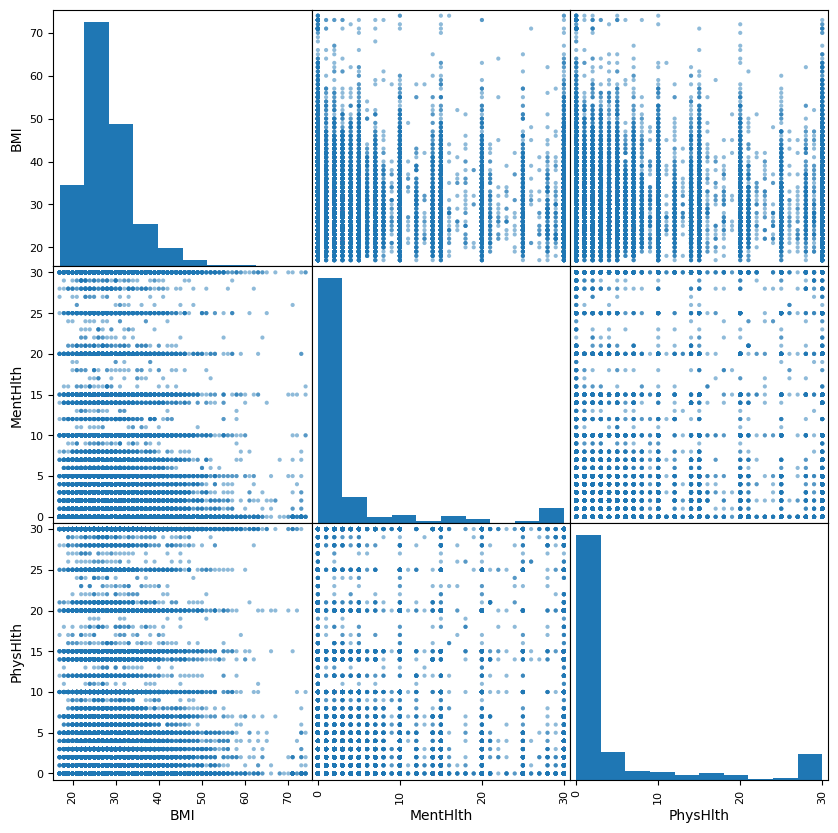

In [23]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
pass

Теперь можем заметить
* у людей с большим `BMI` (индексом массы тела) больше проблем с психическим и физическим здоровьем
* у людей с меньшим `MentHlth` (психическим здоровьем) меньшее `PhysHlth` (физическое здоровье). То есть чем лучше психическое здоровьем, тем лучше физическое, и наоборот

### Просмотр и анализ номинальных признаков

0.0    73791
1.0     7482
Name: HeartDiseaseorAttack, dtype: int64


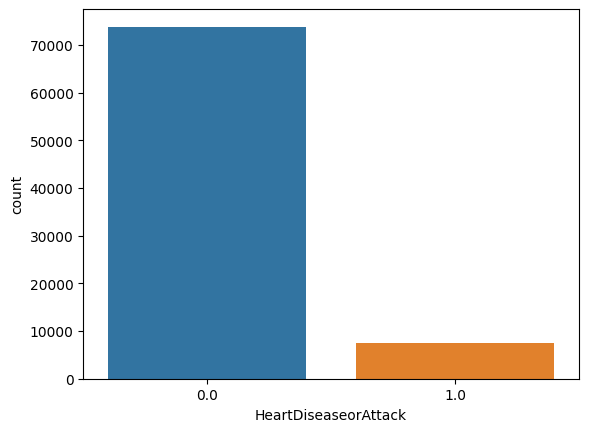

In [24]:
print(data['HeartDiseaseorAttack'].value_counts())
sns.countplot(data, x='HeartDiseaseorAttack')
pass

0.0    46383
1.0    34890
Name: HighBP, dtype: int64


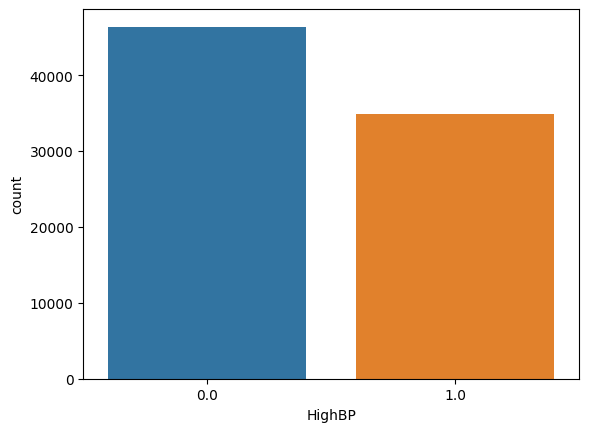

In [25]:
print(data['HighBP'].value_counts())
sns.countplot(data, x='HighBP')
pass

0.0    46413
1.0    34860
Name: HighChol, dtype: int64


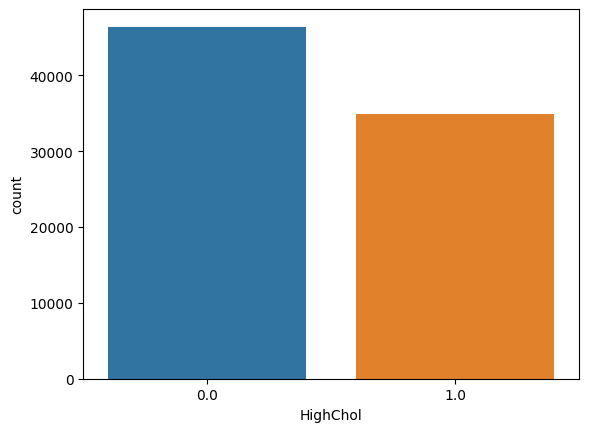

In [26]:
print(data['HighChol'].value_counts())
sns.countplot(data, x='HighChol')
pass

1.0    78245
0.0     3027
Name: CholCheck, dtype: int64


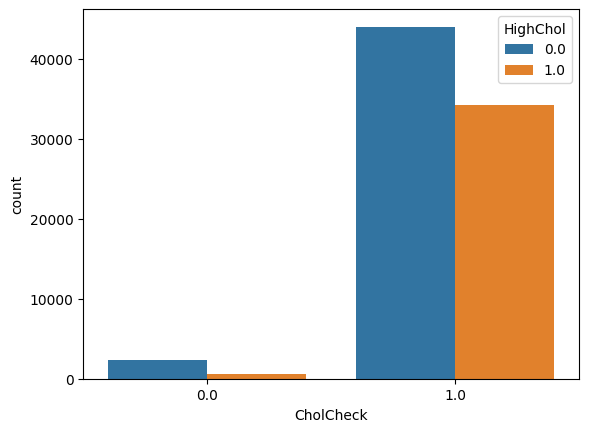

In [27]:
print(data['CholCheck'].value_counts())
sns.countplot(data, x='CholCheck', hue='HighChol')
pass

0.0    45472
1.0    35800
Name: Smoker, dtype: int64


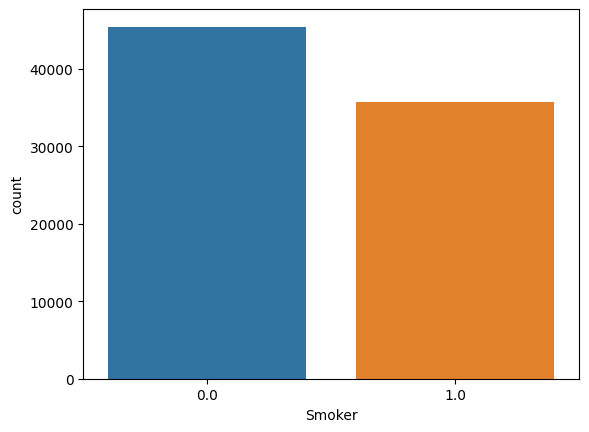

In [28]:
print(data['Smoker'].value_counts())
sns.countplot(data, x='Smoker')
pass

0.0    77943
1.0     3329
Name: Stroke, dtype: int64


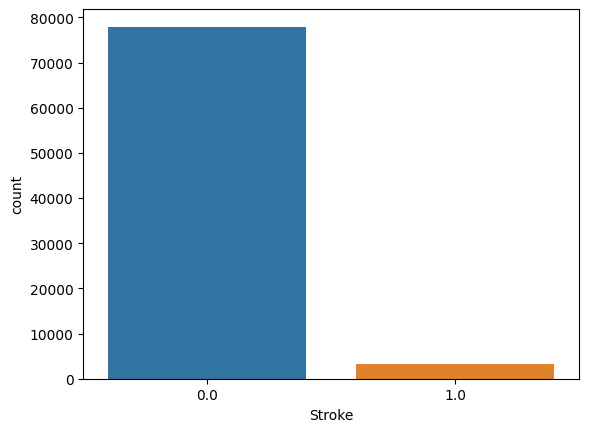

In [29]:
print(data['Stroke'].value_counts())
sns.countplot(data, x='Stroke')
pass

0.0    68458
2.0    11245
1.0     1569
Name: Diabetes, dtype: int64


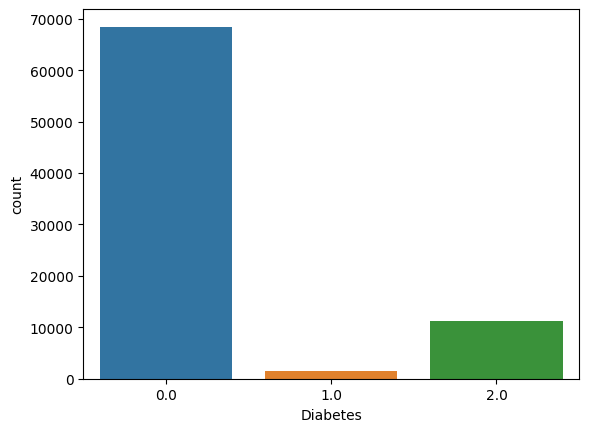

In [30]:
print(data['Diabetes'].value_counts())
sns.countplot(data, x='Diabetes')
pass

1.0    62285
0.0    18987
Name: PhysActivity, dtype: int64


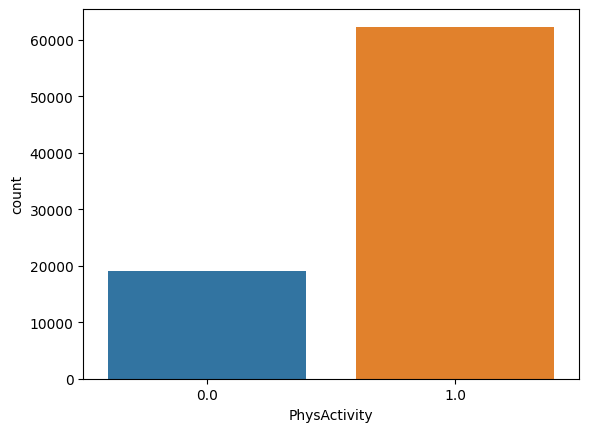

In [31]:
print(data['PhysActivity'].value_counts())
sns.countplot(data, x='PhysActivity')
pass

1.0    51590
0.0    29682
Name: Fruits, dtype: int64


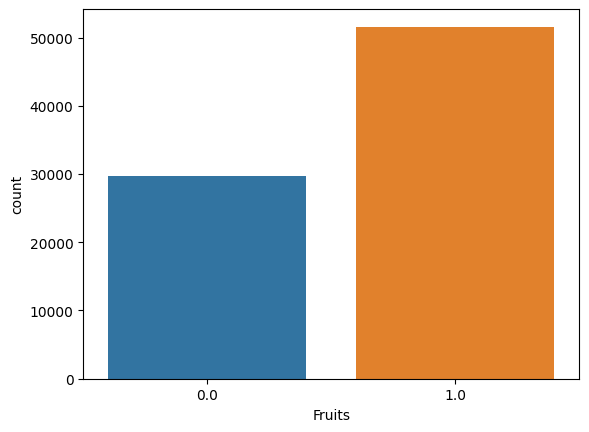

In [32]:
print(data['Fruits'].value_counts())
sns.countplot(data, x='Fruits')
pass

1.0    66211
0.0    15061
Name: Veggies, dtype: int64


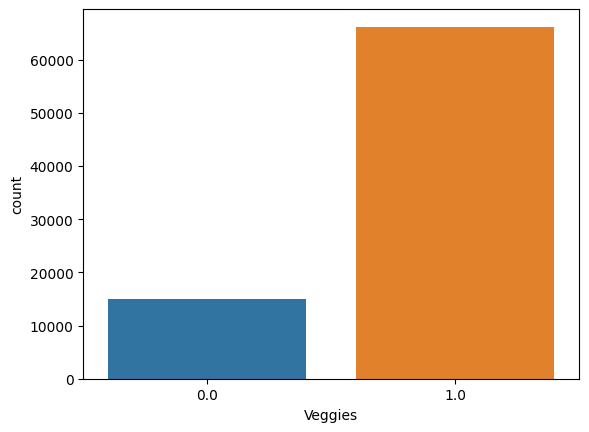

In [33]:
print(data['Veggies'].value_counts())
sns.countplot(data, x='Veggies')
pass

0.0    76649
1.0     4623
Name: HvyAlcoholConsump, dtype: int64


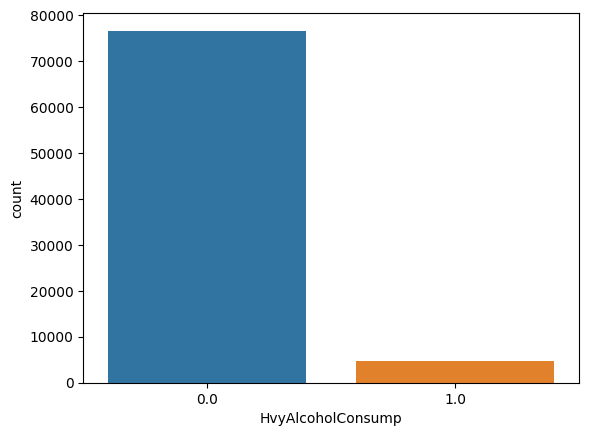

In [34]:
print(data['HvyAlcoholConsump'].value_counts())
sns.countplot(data, x='HvyAlcoholConsump')
pass

0.0    45231
1.0    36041
Name: Sex, dtype: int64


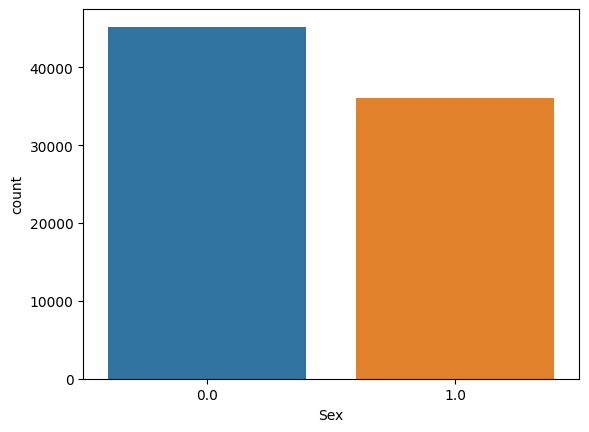

In [35]:
print(data['Sex'].value_counts())
sns.countplot(data, x='Sex')
pass

9.0     10568
10.0    10489
8.0      9712
7.0      8233
11.0     7818
6.0      6147
13.0     5779
12.0     5256
5.0      5092
4.0      4387
3.0      3504
2.0      2426
1.0      1861
Name: Age, dtype: int64


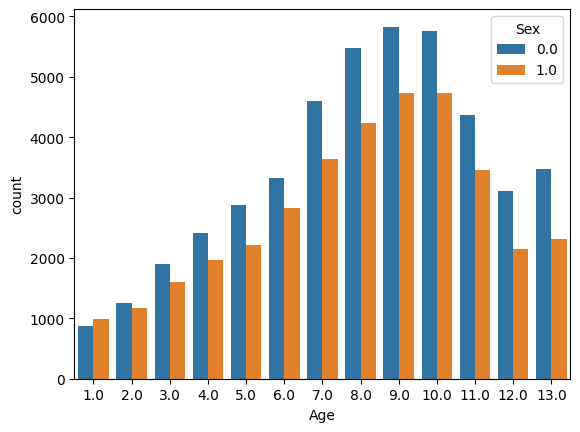

In [36]:
print(data['Age'].value_counts())
sns.countplot(data, x='Age', hue='Sex')
pass

6.0    35612
5.0    22253
4.0    18976
3.0     2963
2.0     1414
1.0       54
Name: Education, dtype: int64


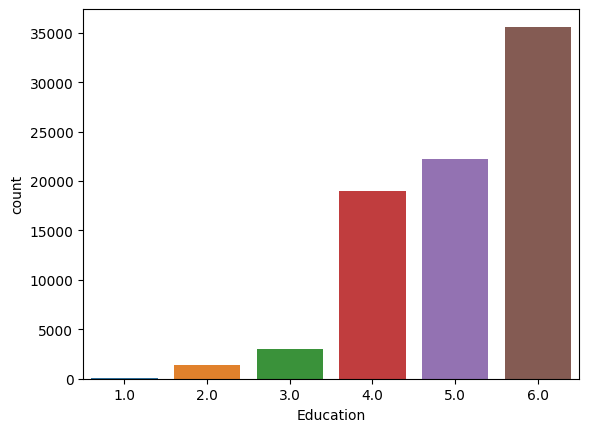

In [37]:
print(data['Education'].value_counts())
sns.countplot(data, x='Education')
pass

8.0    29876
7.0    13806
6.0    11591
5.0     8109
4.0     6304
3.0     4917
2.0     3715
1.0     2954
Name: Income, dtype: int64


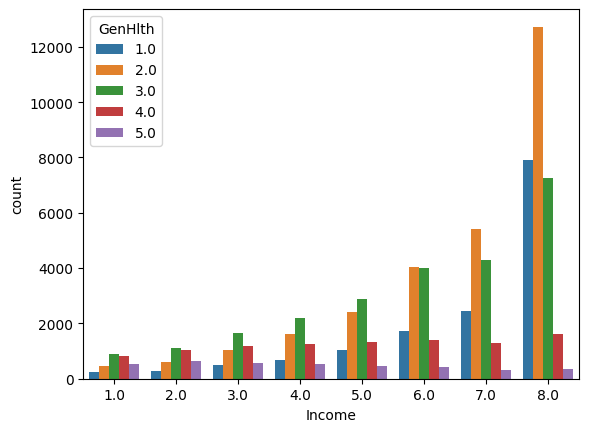

In [38]:
print(data['Income'].value_counts())
sns.countplot(data, x='Income', hue='GenHlth')
pass

1.0    77135
0.0     4137
Name: AnyHealthcare, dtype: int64


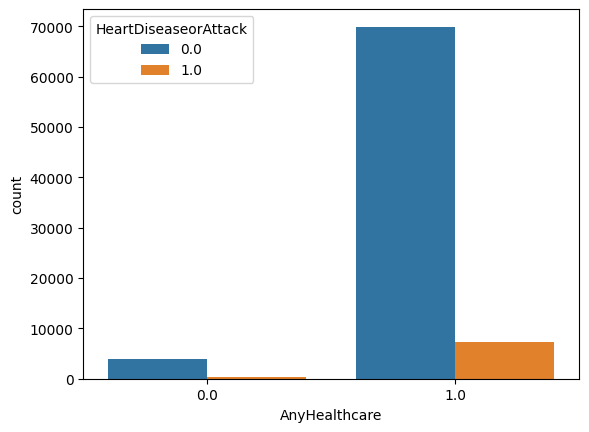

In [39]:
print(data['AnyHealthcare'].value_counts())
sns.countplot(data, x='AnyHealthcare', hue='HeartDiseaseorAttack')
pass

Вычислим матрицу корреляции для количественнх признаков:

In [40]:
corr_mat = data.corr(numeric_only = True)
corr_mat

,BMI,MentHlth,PhysHlth
BMI,1.000000,0.089702,0.127332
MentHlth,0.089702,1.000000,0.351319
PhysHlth,0.127332,0.351319,1.000000


Для большего удобства используем визуальный образ этой матрицы:

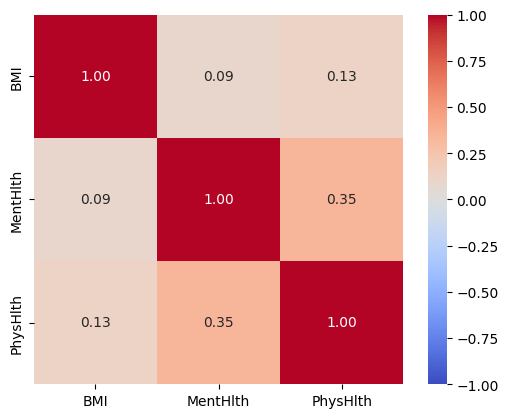

In [41]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [42]:
corr_mat > 0.5

,BMI,MentHlth,PhysHlth
BMI,True,False,False
MentHlth,False,True,False
PhysHlth,False,False,True


In [43]:
np.triu(corr_mat, k=1)

array([[0.        , 0.08970194, 0.12733241],
       [0.        , 0.        , 0.35131942],
       [0.        , 0.        , 0.        ]])

In [44]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Series([], dtype: float64)

Следовательно, какая-либо сильная коррекляция между количественными признаками отсутствует

## 3. Обработка пропущенных значений

In [45]:
data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               1
BMI                     1
Smoker                  1
Stroke                  1
Diabetes                1
PhysActivity            1
Fruits                  1
Veggies                 1
HvyAlcoholConsump       1
AnyHealthcare           1
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

Пропущеных значений нет, следовательно в обработке не нуждается

## Обработка категориальных признаков

Категориальные _бинарные_ признаки не нужно приводить к числовым, они уже представлены в числовом виде **0** и **1**

К _небинарным_ категориальным признакам применим метод бинаризации:

In [46]:
nonbinaries = pd.get_dummies(data[['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']])
print(nonbinaries.columns)

Index(['Diabetes_0.0', 'Diabetes_1.0', 'Diabetes_2.0', 'GenHlth_1.0',
       'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0', 'Age_1.0',
       'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0',
       'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
       'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0',
       'Education_5.0', 'Education_6.0', 'Income_1.0', 'Income_2.0',
       'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0',
       'Income_8.0'],
      dtype='object')


In [47]:
data = pd.concat((data, nonbinaries), axis=1).drop(['Diabetes', 'GenHlth', 'Age', 'Education', 'Income'], axis=1)

In [48]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0


## 5. Нормализация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать

Наиболее часто используют один из трех следующих способов:
* _приведение к отрезку_ **\[0, 1\]**- это линейное преобразование, приводящее все значения к заданному отрезку
* _стандартизация_ - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению
* _нормализация_ - приведение данных к единичной норме

Выполним стандартизацию всех признаков:

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
count,8.127300e+04,8.127300e+04,8.127300e+04,8.127200e+04,8.127200e+04,8.127200e+04,8.127200e+04,8.127200e+04,8.127200e+04,8.127200e+04,...,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04,8.127300e+04
mean,-6.084896e-17,-8.392960e-18,-4.895893e-18,2.049306e-16,-3.077456e-17,-2.867630e-17,3.304769e-17,-1.804509e-16,5.175722e-17,-6.766907e-17,...,6.749339e-17,-2.482917e-17,-1.573680e-17,9.791786e-17,-2.727712e-17,4.406304e-17,-4.581157e-17,-8.392960e-17,4.406304e-17,6.434603e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-3.184250e-01,-8.673034e-01,-8.666503e-01,-5.084194e+00,-1.785073e+00,-8.872980e-01,-2.066657e-01,-1.811188e+00,-1.318367e+00,-2.096709e+00,...,-6.140372e-01,-8.831317e-01,-1.942100e-01,-2.188599e-01,-2.537631e-01,-2.899795e-01,-3.329162e-01,-4.078497e-01,-4.523642e-01,-7.624166e-01
25%,-3.184250e-01,-8.673034e-01,-8.666503e-01,1.966880e-01,-6.688465e-01,-8.872980e-01,-2.066657e-01,5.521238e-01,-1.318367e+00,4.769379e-01,...,-6.140372e-01,-8.831317e-01,-1.942100e-01,-2.188599e-01,-2.537631e-01,-2.899795e-01,-3.329162e-01,-4.078497e-01,-4.523642e-01,-7.624166e-01
50%,-3.184250e-01,-8.673034e-01,-8.666503e-01,1.966880e-01,-1.904636e-01,-8.872980e-01,-2.066657e-01,5.521238e-01,7.585144e-01,4.769379e-01,...,-6.140372e-01,-8.831317e-01,-1.942100e-01,-2.188599e-01,-2.537631e-01,-2.899795e-01,-3.329162e-01,-4.078497e-01,-4.523642e-01,-7.624166e-01
75%,-3.184250e-01,1.152999e+00,1.153868e+00,1.966880e-01,4.473803e-01,1.127017e+00,-2.066657e-01,5.521238e-01,7.585144e-01,4.769379e-01,...,1.628566e+00,1.132334e+00,-1.942100e-01,-2.188599e-01,-2.537631e-01,-2.899795e-01,-3.329162e-01,-4.078497e-01,-4.523642e-01,1.311619e+00
max,3.140457e+00,1.152999e+00,1.153868e+00,1.966880e-01,7.304202e+00,1.127017e+00,4.838733e+00,5.521238e-01,7.585144e-01,4.769379e-01,...,1.628566e+00,1.132334e+00,5.149064e+00,4.569134e+00,3.940683e+00,3.448520e+00,3.003759e+00,2.451884e+00,2.210608e+00,1.311619e+00


## 6. Разбиение данных на обучающую и тестовую выборки

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (7.5% - обучающая выборка, 2.5% - тестовая. При 75% - обучающая выборка, 25% - тестовая долго отрабатывает):

In [50]:
X = data_raw.drop(['HeartDiseaseorAttack'], axis=1)
y = data_raw['HeartDiseaseorAttack']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(6141, 2048)

## 7. Запустить классификатор (ререссию) ближайших соседей

Используем классификатор k ближайших соседей

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
neighbors = [1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40]
errors = []
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X_train, y_train)
    errors.append((k, float(1 - model.score(X_train, y_train)), float(1 - model.score(X_test, y_test))))

## 8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей). Сделать выводы

In [53]:
from pprint import pprint
print('Количество соседей, Ошибка на обучающей выборке, Ошибка на тестовой выборке')
pprint(errors)

Количество соседей, Ошибка на обучающей выборке, Ошибка на тестовой выборке
[(1, 0.00016283992835042227, 0.1484375),
 (2, 0.0731151278293437, 0.103515625),
 (3, 0.07295228790099328, 0.11767578125),
 (4, 0.08321120338707055, 0.10595703125),
 (5, 0.08386256310047224, 0.109375),
 (7, 0.085653802312327, 0.1025390625),
 (9, 0.08630516202572869, 0.10009765625),
 (11, 0.085653802312327, 0.0986328125),
 (13, 0.08760788145253218, 0.09765625),
 (15, 0.08793356130923302, 0.09716796875),
 (20, 0.08842208109428429, 0.09716796875),
 (25, 0.08809640123758344, 0.09765625),
 (30, 0.08907344080768609, 0.09716796875),
 (35, 0.08907344080768609, 0.09765625),
 (40, 0.08907344080768609, 0.0966796875)]


In [54]:
optimal_error = min(errors, key=lambda error: error[2])
model = KNeighborsClassifier(n_neighbors=optimal_error[0], p=2)
model.fit(X_train, y_train)

print('Оптимальное количество соседей, k: ', optimal_error[0])
print('Оптимальная (минимальная) ошибка на тестовой выборке: ', optimal_error[2])

Оптимальное количество соседей, k:  40
Оптимальная (минимальная) ошибка на тестовой выборке:  0.0966796875


Посмотрим на метрики

In [55]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_train = mean_squared_error(y_train, y_train_predict) ** .5
RMSE_test  = mean_squared_error(y_test,  y_test_predict) ** .5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [57]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
k Nearest Neighbours,0.298452,0.310934


In [58]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
k Nearest Neighbours,-0.094175,-0.107027


Посмотрим на матрицу рассоглосования для метода k ближайших соседей с оптимальным k

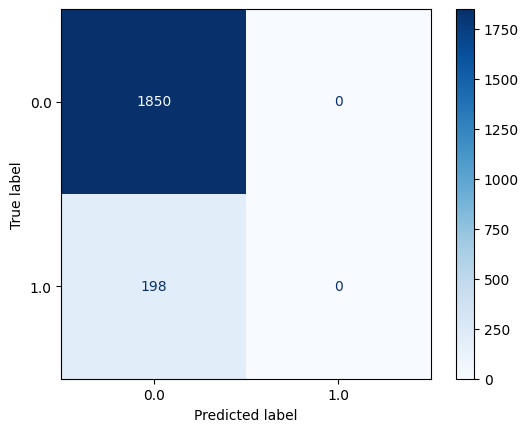

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
pass

Большая часть ошибок `FN` (false negative) говорит о том, что для людей с заболеванием сердца алгоритм предсказывает отсутствие болезни

## Выводы

**Задача.** Спрогнозировать риск сердечно-сосудистых заболеваний

В данном датасете нет пропущенных значений, поэтому их не нужно обрабатывать
Так же в датасете есть несбалансированные классы (**90/10** - люди без заболеваний сердца и люди c заболеванием сердца соответственно). Была проведена балансировка классов.
Количество выбросов: **~0.7%**

Для решения задачи использовался классификатор k ближайших соседей, причем были проведены вычисления при разном значениии параметра k соседей. Получил оптимальное число соседей **k=30**. Ошибка на тестовой выборке при **k=30**: **0.09366130558183539**, причем большая часть ошибок вида `FN` – false negative (для людей с заболеванием сердца предсказывает отсутствие болезни) и практически полное отсутствие истинно положительных примеров `TP` - true positive. Если сбалансировать классы, то, скорее всего, количество `TP` вырастет

Такой метод классификации не подходит для решения данной задачи

## Логистическая регрессия

In [79]:
from sklearn import model_selection
cv = model_selection.ShuffleSplit(n_splits = 10, train_size = 0.075, test_size = 0.025, random_state = 0)

In [80]:
from sklearn.model_selection import learning_curve

In [81]:
def draw_learning_curve(model, X = X, y = y, cv = cv,
                       train_sizes = np.linspace(0.1, 1.0, 5)):

    sizes, scores_train, scores_test = learning_curve(model, X, y, cv = cv,
                train_sizes = train_sizes)

    err_train = 1 - scores_train
    err_test  = 1 - scores_test

    mean_err_train = np.mean(err_train, axis = 1)
    std_err_train  = np.std (err_train, axis = 1)
    mean_err_test  = np.mean(err_test,  axis = 1)
    std_err_test   = np.std (err_test,  axis = 1)

    plt.figure(figsize = (8, 6))
    plt.fill_between(sizes, mean_err_train - std_err_train, mean_err_train + std_err_train, alpha = 0.15,
                     color = "r")
    plt.fill_between(sizes, mean_err_test  - std_err_test,  mean_err_test  + std_err_test,  alpha = 0.15,
                     color = "m")
    plt.plot(sizes, mean_err_train, 'ro-', markeredgecolor = 'r', label = "Train error")
    plt.plot(sizes, mean_err_test,  'mo-', markeredgecolor = 'm', label = "CV error")
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.grid()
    plt.legend(loc = 'best')

Text(0.5, 1.0, 'Logistic regression')

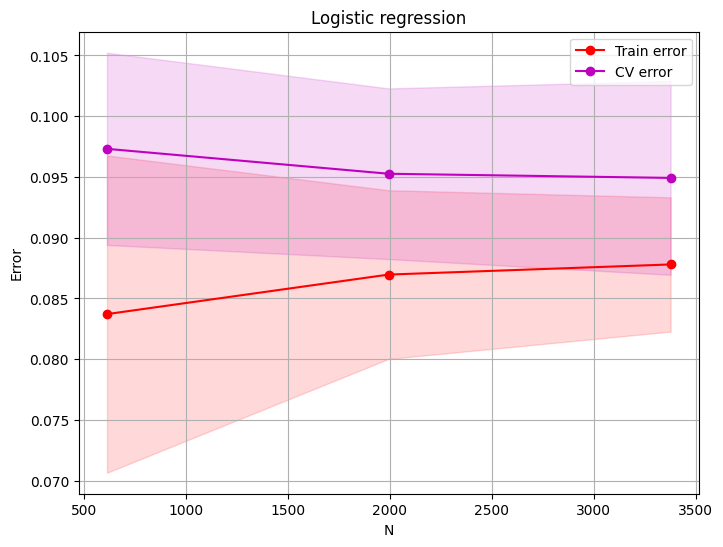

In [82]:
from sklearn.linear_model import LogisticRegression
draw_learning_curve(LogisticRegression(max_iter = 600))
plt.title('Logistic regression')

Небольшой разброс, большое смещение

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(6141, 2048)

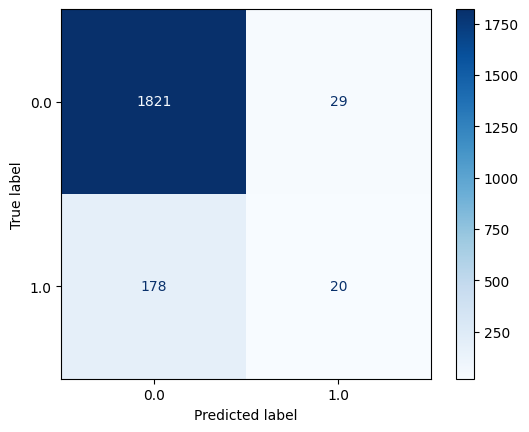

In [84]:
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### Random Forest

Text(0.5, 1.0, 'Random Forest Classifier')

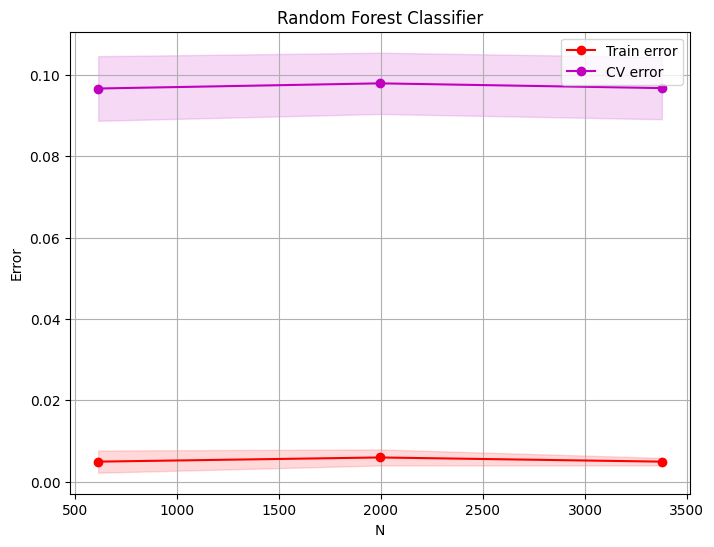

In [85]:
from sklearn.ensemble import RandomForestClassifier
draw_learning_curve(RandomForestClassifier(n_estimators = 20))
plt.title('Random Forest Classifier')

Большой разброс => переобучение

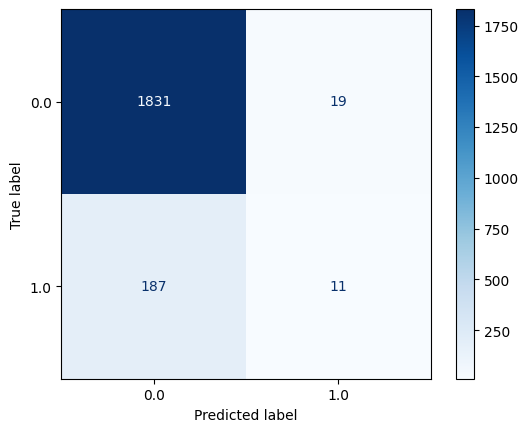

In [86]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### Полносвязная нейронная сеть

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Fully connected neural network')

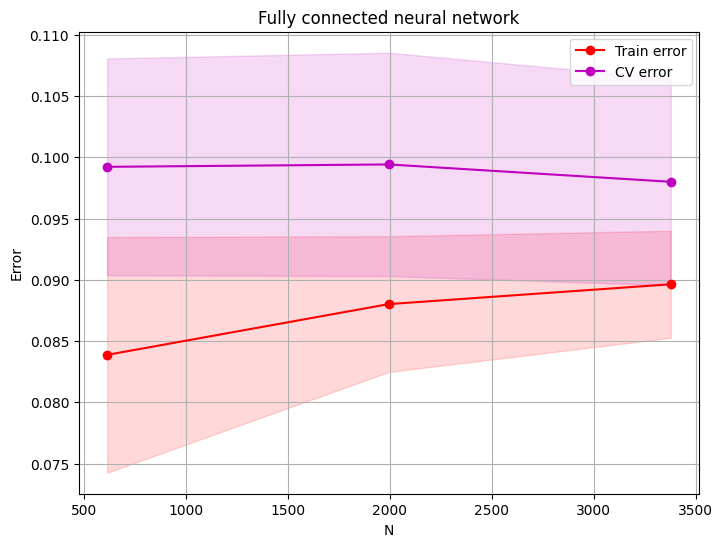

In [87]:
from sklearn.neural_network import MLPClassifier
draw_learning_curve(MLPClassifier(hidden_layer_sizes = (5), max_iter=600, random_state = 42))
plt.title('Fully connected neural network')

Небольшой разброс, большое смещение

Найдем оптимальное значение параметра $\alpha$ и количество нейронов

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(6141, 2048)

In [93]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-5, 5, 5)
neurons_arr = np.linspace(1, 10, 5)
test_err = []
train_err = []

for neuron in neurons_arr:
    test_err.append([])
    train_err.append([])
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(hidden_layer_sizes = (int(neuron)), max_iter=600, random_state = 42, alpha = alpha)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err[int(neuron) - 1].append(np.mean(y_train != y_train_pred))
        test_err[int(neuron) - 1].append(np.mean(y_test != y_test_pred))

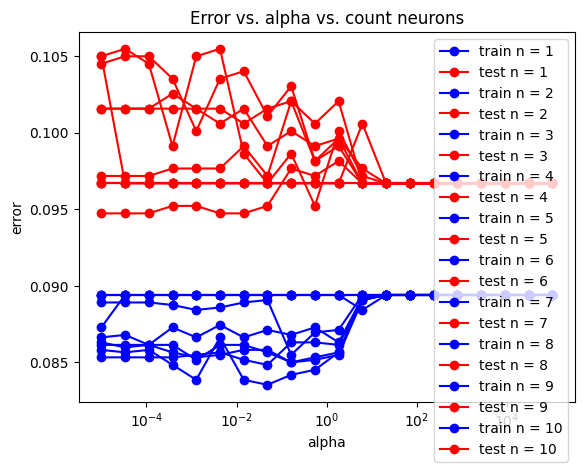

In [94]:
for i in range(0, 10):
    plt.semilogx(alpha_arr, train_err[i], 'b-o', label = 'train n = ' + str(i + 1))
    plt.semilogx(alpha_arr, test_err[i], 'r-o', label = 'test n = ' + str(i + 1))
plt.title('Error vs. alpha vs. count neurons')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Можно заметить, что ни одна вариация парметра $\alpha$ и количества нейронов не уменьшила ошибку должным образом, найдем оптимальные параметры $\alpha$ и количества нейронов

In [95]:
min_test_err_arr = []

for i in range(0, 10):
    min_test_err_arr.append(np.min(test_err[i]))

min_test_err = np.min(min_test_err_arr)
res_n = [i for i, j in enumerate(min_test_err_arr) if j == min_test_err]

res_a = [i for i, j in enumerate(test_err[res_n[0]]) if j == min_test_err]

print('Count neurons = ', int(neurons_arr[res_n[0]]))
print('Parameter a = ', alpha_arr[res_a[0]])
print('Minimum test error = ', min_test_err)

Count neurons =  7
Parameter a =  1e-05
Minimum test error =  0.0947265625


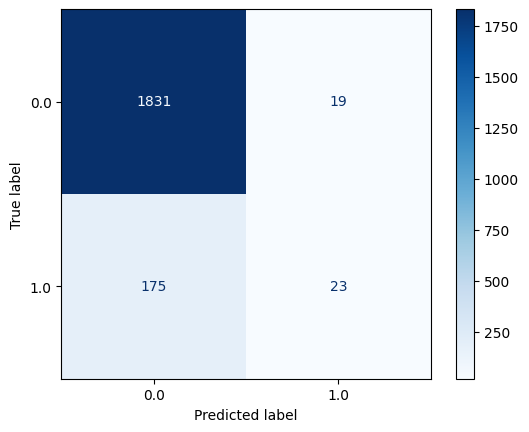

In [96]:
model = MLPClassifier(hidden_layer_sizes = (int(neurons_arr[res_n[0]])), max_iter=600, random_state = 42, alpha = alpha_arr[res_a[0]])
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

Во всех случаях получаем тот же результат, что и при использовании классификатора с $k$ ближайшими соседями: большая часть ошибок, ошибки типа `FN`
 – false negative (для людей с заболеванием сердца предсказывает отсутствие болезни) Очень малоее число`TP`
 – true positive, истинно положительных примеров

#### Выводы
По заданию к 29 декабря были запущены другие классификаторы: логистическая регрессия, random forest, нейронные сети. На них получились схожие результаты с исходным решением. Можно сделать предположение, что текущий набор данных плохо подходит для решения поставленой задачи